In [1]:
# Import libraries

import pandas as pd                   # data analysis library
import matplotlib.pyplot as plt       # data visualization library
import seaborn as sns                 # enhanced data visualization library
import numpy as np                    # numerical computational library
import datetime as dt                 # date & time manipulation library
import random

import yahoo_fin as yf                # data scraping library
import yahoo_fin.stock_info as si     # module from library for stock_info


from pandas_datareader import data    # remote data access for Pandas
from random import choice             # randomly select an item from a list of items
from random import shuffle            # randomly shuffle items in a list of items

# Download packages
#%pip install package_name

# Dependancy for yahoo_fin is requests_html

<br><br>

### Quote Table (Multiple Tickers)

In [2]:
# Generate list of tickers listed on SP500
tickers = si.tickers_sp500()

# Set seed
#random.seed(123)


# Pull a random list of 50 tickers from above list
tickers = ['ADBE', 'CRM', 'CSCO', 'NVDA', 'V', 'INTU', 'TXN', 'VZ', 'SBUX', 'UPS', 'MA', 'KO', 'PG', 'TAN', 'ICLN', 'HD', 'WMT', 'UNH', 'TMO', 'LIN', 'PYPL', 'DIS', 'CMCSA', 'NFLX','PEP']



# Instantiate dictionary to hold our scraped data    
sp_quotes = {}

# Loop through each ticker from the list of tickers
for ticker in tickers:
    temp = si.get_quote_table(ticker, dict_result = False)   # scrape quote table
    sp_quotes[ticker] = temp                                 # populate prior dictionary

    
    
    
# Combine all the valutation measures into a single DataFrame
sp_quotes = pd.concat(sp_quotes)               # combine
sp_quotes = sp_quotes.reset_index()            # reset index into integers (it's currently tickers)

# Remove unnecessary column
del sp_quotes["level_1"]


# Update column names
sp_quotes.columns = ["Ticker", "Attribute", "Value"]
sp_quotes

,Ticker,Attribute,Value
0,ADBE,1y Target Est,563.3
1,ADBE,52 Week Range,255.13 - 536.88
2,ADBE,Ask,479.79 x 1100
3,ADBE,Avg. Volume,2.53169e+06
4,ADBE,Beta (5Y Monthly),0.97
...,...,...,...
420,PEP,Open,135.01
421,PEP,PE Ratio (TTM),25.88
422,PEP,Previous Close,135.37
423,PEP,Quote Price,132.51


<br>

#### Dividend Yields

In [3]:
# Create feature
div_filter = sp_quotes['Attribute'] == 'Forward Dividend & Yield'


# Apply filter
div_yields = sp_quotes[div_filter]


# Check data
div_yields

,Ticker,Attribute,Value
10,ADBE,Forward Dividend & Yield,N/A (N/A)
27,CRM,Forward Dividend & Yield,N/A (N/A)
44,CSCO,Forward Dividend & Yield,1.48 (3.24%)
61,NVDA,Forward Dividend & Yield,0.64 (0.11%)
78,V,Forward Dividend & Yield,1.28 (0.63%)
95,INTU,Forward Dividend & Yield,2.36 (0.57%)
112,TXN,Forward Dividend & Yield,4.08 (2.29%)
129,VZ,Forward Dividend & Yield,2.51 (4.45%)
146,SBUX,Forward Dividend & Yield,1.80 (1.74%)
163,UPS,Forward Dividend & Yield,4.08 (2.54%)


In [4]:
# Top 10 tickers based on HIGHEST dividend yield

# Hide warnings
import warnings
warnings.filterwarnings('ignore')


# Extract the yield using REGEX
div_yields['Yield'] = div_yields.Value.str.extract(r'\((.*?)\%',  
                                                   expand = True) 


# Change type to float
div_yields['Yield'] = div_yields['Yield'].astype(float)


# Drop the Value column
div_yields.drop('Value', axis = 1, inplace = True)


# Place quantitative cut for top 10 tickers
top_div_yields = div_yields.nlargest(10, 'Yield')

# Print top tickers
top_div_yields

,Ticker,Attribute,Yield
129,VZ,Forward Dividend & Yield,4.45
197,KO,Forward Dividend & Yield,3.27
44,CSCO,Forward Dividend & Yield,3.24
418,PEP,Forward Dividend & Yield,3.09
163,UPS,Forward Dividend & Yield,2.54
214,PG,Forward Dividend & Yield,2.49
112,TXN,Forward Dividend & Yield,2.29
265,HD,Forward Dividend & Yield,2.12
384,CMCSA,Forward Dividend & Yield,1.92
146,SBUX,Forward Dividend & Yield,1.74


In [5]:
# Save tickers for later

div_yield_tickers = top_div_yields['Ticker'].to_list()

div_yield_tickers

['VZ', 'KO', 'CSCO', 'PEP', 'UPS', 'PG', 'TXN', 'HD', 'CMCSA', 'SBUX']

<br>

#### P/E Ratio

In [6]:
# P/E Ratio Comparison

# Create filter
pe_ratio_filter = sp_quotes["Attribute"] == "PE Ratio (TTM)"


# Subset data using filter
pe_ratios = sp_quotes[pe_ratio_filter]


# Check data
pe_ratios

,Ticker,Attribute,Value
13,ADBE,PE Ratio (TTM),44.24
30,CRM,PE Ratio (TTM),63.91
47,CSCO,PE Ratio (TTM),19.11
64,NVDA,PE Ratio (TTM),97.61
81,V,PE Ratio (TTM),42.26
98,INTU,PE Ratio (TTM),55.24
115,TXN,PE Ratio (TTM),29.88
132,VZ,PE Ratio (TTM),13.13
149,SBUX,PE Ratio (TTM),181.99
166,UPS,PE Ratio (TTM),97.89


In [7]:
# Select top 10 stocks in terms of LOWEST P/E ratio

# Convert recent column to integer (it's currently object / string)
pe_ratios['Value'] = pe_ratios['Value'].astype(float)

# Select the top 20 tickers
lowest_pe_ratios = pe_ratios.nsmallest(20,'Value')

# Print
lowest_pe_ratios

,Ticker,Attribute,Value
132,VZ,PE Ratio (TTM),13.13
47,CSCO,PE Ratio (TTM),19.11
302,UNH,PE Ratio (TTM),20.25
387,CMCSA,PE Ratio (TTM),22.85
217,PG,PE Ratio (TTM),24.02
268,HD,PE Ratio (TTM),24.19
421,PEP,PE Ratio (TTM),25.88
200,KO,PE Ratio (TTM),27.99
285,WMT,PE Ratio (TTM),29.12
115,TXN,PE Ratio (TTM),29.88


In [8]:
# Save tickers for later

pe_ratios_tickers = lowest_pe_ratios['Ticker'].to_list()

pe_ratios_tickers

['VZ',
 'CSCO',
 'UNH',
 'CMCSA',
 'PG',
 'HD',
 'PEP',
 'KO',
 'WMT',
 'TXN',
 'TMO',
 'V',
 'ADBE',
 'MA',
 'LIN',
 'INTU',
 'CRM',
 'PYPL',
 'NFLX',
 'NVDA']

<br>

### Balance Sheet  (Multiple Tickers)

In [9]:
# Instantiate dictionary to hold our scraped data    
sp_bs = {}

# Loop through each ticker from the list of tickers
for ticker in pe_ratios_tickers :
    temp = si.get_balance_sheet(ticker, yearly=True)     # scrape balance sheet data
    temp = temp.iloc[:,:2]                               # subset for attribute name & recent values
    temp.columns = ["2020", "2019"]                      # rename columns
    sp_bs[ticker] = temp                                # populate prior dictionary

# Combine all the balance sheet data into a single DataFrame
sp_bs = pd.concat(sp_bs)               # combine
sp_bs = sp_bs.reset_index()       # reset index into integers

# Rename columns
sp_bs.columns = ["Ticker", "Attribute", "2020", "2019"]

# Check data
sp_bs

,Ticker,Attribute,2020,2019
0,VZ,intangibleAssets,1.055100e+11,1.045570e+11
1,VZ,capitalSurplus,1.340400e+10,1.341900e+10
2,VZ,totalLiab,2.472090e+11,2.288920e+11
3,VZ,totalStockholderEquity,6.784200e+10,6.139500e+10
4,VZ,minorityInterest,1.430000e+09,1.440000e+09
...,...,...,...,...
519,NVDA,netReceivables,1.657000e+09,1.424000e+09
520,NVDA,longTermDebt,1.991000e+09,1.988000e+09
521,NVDA,inventory,9.790000e+08,1.575000e+09
522,NVDA,accountsPayable,6.870000e+08,5.110000e+08


#### Equity & Debt

In [10]:
# TOTAL STOCKHOLDER EQUITY

# Create filter for total stockholder equity
equityFilter = sp_bs['Attribute'] == 'totalStockholderEquity'

# Subset combined_bs DF for total stockholder equity
equityComparison = sp_bs[equityFilter]

equityComparison

,Ticker,Attribute,2020,2019
3,VZ,totalStockholderEquity,6.784200e+10,6.139500e+10
29,CSCO,totalStockholderEquity,3.792000e+10,3.357100e+10
54,UNH,totalStockholderEquity,6.832800e+10,5.761600e+10
82,CMCSA,totalStockholderEquity,9.032300e+10,8.272600e+10
109,PG,totalStockholderEquity,4.562400e+10,4.626600e+10
134,HD,totalStockholderEquity,-3.116000e+09,-1.878000e+09
160,PEP,totalStockholderEquity,1.345400e+10,1.478600e+10
189,KO,totalStockholderEquity,1.929900e+10,1.898100e+10
216,WMT,totalStockholderEquity,8.129800e+10,7.466900e+10
244,TXN,totalStockholderEquity,9.187000e+09,8.907000e+09


In [11]:
# Quantitative Cut

# Select top 10 tickers based off total stockholder equity in 2020 & 2019
equityComparison.nlargest(10, ['2020', '2019'])

,Ticker,Attribute,2020,2019
82,CMCSA,totalStockholderEquity,9.032300e+10,8.272600e+10
216,WMT,totalStockholderEquity,8.129800e+10,7.466900e+10
54,UNH,totalStockholderEquity,6.832800e+10,5.761600e+10
3,VZ,totalStockholderEquity,6.784200e+10,6.139500e+10
374,LIN,totalStockholderEquity,4.731700e+10,4.907400e+10
109,PG,totalStockholderEquity,4.562400e+10,4.626600e+10
29,CSCO,totalStockholderEquity,3.792000e+10,3.357100e+10
270,TMO,totalStockholderEquity,3.450700e+10,2.967500e+10
428,CRM,totalStockholderEquity,3.388500e+10,1.560500e+10
296,V,totalStockholderEquity,3.112400e+10,2.922200e+10


<br>

---

<br>

In [12]:
# TOTAL STOCKHOLDER EQUITY & LONGTERM DEBT

# Create filter for total stockholder equity
equityFilter = sp_bs['Attribute'] == 'totalStockholderEquity'
debtFilter   = sp_bs['Attribute'] == 'longTermDebt' 

# Subset combined_bs DF for total stockholder equity
EqDbtComparison = sp_bs[equityFilter | debtFilter]

EqDbtComparison

,Ticker,Attribute,2020,2019
3,VZ,totalStockholderEquity,6.784200e+10,6.139500e+10
22,VZ,longTermDebt,1.231730e+11,1.007090e+11
29,CSCO,totalStockholderEquity,3.792000e+10,3.357100e+10
50,CSCO,longTermDebt,1.157800e+10,1.447500e+10
54,UNH,totalStockholderEquity,6.832800e+10,5.761600e+10
69,UNH,longTermDebt,3.864800e+10,3.680800e+10
82,CMCSA,totalStockholderEquity,9.032300e+10,8.272600e+10
103,CMCSA,longTermDebt,1.049910e+11,1.029310e+11
109,PG,totalStockholderEquity,4.562400e+10,4.626600e+10
128,PG,longTermDebt,2.353700e+10,2.036200e+10


In [13]:
# Quantitative Cut

# Select top 10 tickers in terms of highest debt & equity in 2020 & 2019
EqDbtComparison.drop_duplicates(subset = 'Ticker', 
                                keep = 'first').nlargest(10, ['2020', '2019'])

,Ticker,Attribute,2020,2019
82,CMCSA,totalStockholderEquity,9.032300e+10,8.272600e+10
216,WMT,totalStockholderEquity,8.129800e+10,7.466900e+10
54,UNH,totalStockholderEquity,6.832800e+10,5.761600e+10
3,VZ,totalStockholderEquity,6.784200e+10,6.139500e+10
374,LIN,totalStockholderEquity,4.731700e+10,4.907400e+10
109,PG,totalStockholderEquity,4.562400e+10,4.626600e+10
29,CSCO,totalStockholderEquity,3.792000e+10,3.357100e+10
270,TMO,totalStockholderEquity,3.450700e+10,2.967500e+10
428,CRM,totalStockholderEquity,3.388500e+10,1.560500e+10
296,V,totalStockholderEquity,3.112400e+10,2.922200e+10


In [14]:
# Save dataframe as csv

#combined_is.to_csv('./combined_income_statement.csv', header = True, index  = False)

<br><br>

## Monte Carlo Simulations

### Portfolio Formation

In [15]:
# Our tickers from PE ratio quantitative cut

pe_ratios_tickers


['VZ',
 'CSCO',
 'UNH',
 'CMCSA',
 'PG',
 'HD',
 'PEP',
 'KO',
 'WMT',
 'TXN',
 'TMO',
 'V',
 'ADBE',
 'MA',
 'LIN',
 'INTU',
 'CRM',
 'PYPL',
 'NFLX',
 'NVDA']

In [16]:
# Equal Weights

pe_weights = pd.Series(index = pe_ratios_tickers, dtype = float)

pe_weights[pe_ratios_tickers] = random.random()

pe_weights = pe_weights / np.sum(pe_weights)

pe_weights

VZ       0.05
CSCO     0.05
UNH      0.05
CMCSA    0.05
PG       0.05
HD       0.05
PEP      0.05
KO       0.05
WMT      0.05
TXN      0.05
TMO      0.05
V        0.05
ADBE     0.05
MA       0.05
LIN      0.05
INTU     0.05
CRM      0.05
PYPL     0.05
NFLX     0.05
NVDA     0.05
dtype: float64

In [17]:
# Returns

# Lookback period
start_date = '2018-1-31'           # start day for lookback
end_date   = '2021-1-31'           # end day for lookback    


# Pull data
returns = data.DataReader(name        = pe_ratios_tickers, 
                          data_source = 'yahoo', 
                          start       = start_date, 
                          end         = end_date)['Adj Close']


# Calculate returns
returns = returns.pct_change().dropna()

# Check data
returns

Symbols,VZ,CSCO,UNH,CMCSA,PG,HD,PEP,KO,WMT,TXN,TMO,V,ADBE,MA,LIN,INTU,CRM,PYPL,NFLX,NVDA
Date,,,,,,,,,,,,,,,,,,,,
2018-02-01,0.004254,0.003852,-0.006589,-0.015048,-0.005675,-0.004977,0.000000,-0.002942,-0.010131,0.003738,-0.007809,0.011994,-0.001902,0.023254,-0.010279,-0.013401,-0.010271,-0.081106,-0.019349,-0.021562
2018-02-02,-0.024310,-0.018465,-0.014199,-0.018620,-0.018637,-0.029665,-0.013550,-0.015174,-0.009856,-0.021984,-0.021002,-0.038260,-0.018758,-0.013763,-0.029907,-0.013462,-0.017385,-0.023342,0.008903,-0.029023
2018-02-05,-0.046810,-0.052529,-0.051147,-0.046461,-0.037864,-0.055988,-0.035476,-0.039375,-0.042018,-0.032045,-0.043089,-0.038376,-0.027448,-0.034946,-0.030506,-0.035308,-0.028254,-0.024357,-0.049247,-0.084875
2018-02-06,0.006535,0.035843,0.023452,0.011990,0.016284,0.043307,-0.007863,-0.004901,0.008093,0.015929,0.005617,0.031822,0.022074,0.028495,0.033196,0.020425,0.017836,0.013051,0.045072,0.055592
2018-02-07,0.003541,0.004232,0.002842,0.012100,-0.006555,0.001309,-0.000529,-0.002463,0.019326,-0.036743,-0.009213,-0.002667,-0.010953,-0.003249,-0.034125,0.002611,0.004381,-0.001189,-0.004366,0.014274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,0.016530,0.005807,0.000748,0.005957,0.017231,0.003803,0.011473,0.005981,-0.000888,0.000637,0.008220,-0.005148,0.002117,0.000608,0.006521,-0.001120,0.000664,-0.016865,-0.014845,-0.004321
2021-01-26,-0.031667,0.005108,-0.013513,0.022871,0.006428,-0.008699,0.011557,0.010455,0.008960,-0.008385,-0.021202,0.005125,0.005999,-0.004526,0.010785,0.000988,0.001505,-0.027245,0.009250,-0.015967
2021-01-27,-0.025455,0.009722,-0.029495,-0.033340,-0.035390,-0.030255,-0.026516,-0.015419,-0.024880,-0.049805,-0.049918,-0.034850,-0.034182,-0.037260,-0.050577,-0.031190,-0.006541,-0.045892,-0.068781,-0.038518


In [18]:
print(max_sharpe_portfolio)

NameError: name 'max_sharpe_portfolio' is not defined

In [19]:
print(min_volatility_portfolio)

NameError: name 'min_volatility_portfolio' is not defined

<br><br><br>

### Constrained Weights

In [20]:
def randomNumbers(list_of_weights, ticker, constraints, remaining):
    """
    This function will generate a random set of numbers between specified
    constraints which sum up to a specificied total.
    
    Parameters:
    
    list_of_weights = list of weights with tickers as index
    
    ticker = acts as index --- SET TO 0
    
    constraints = list of two floats to act as your constraints.
                    - 1st float is minimum constraint
                    - 2nd float is maximum constraint
    
    remaining = acts as the sum of random numbers --- SET TO 1
    """
    next_ticker = ticker + 1
    
    if next_ticker == len(list_of_weights):
        
        list_of_weights[ticker] = remaining                        
        
    else:
        
        remaining_tickers = len(list_of_weights) - next_ticker   
    
        remaining_lowerbound = constraints[0] * remaining_tickers  
        
        remaining_upperbound = constraints[1] * remaining_tickers 
        
        actual_lowerbound = max(constraints[0], remaining - remaining_upperbound)
        
        actual_upperbound = min(constraints[1], remaining - remaining_lowerbound)
        
        random_weight = np.random.uniform(low  = actual_lowerbound, 
                                          high = actual_upperbound)

        list_of_weights[ticker] = random_weight
        
        randomNumbers(list_of_weights, 
                      next_ticker, 
                      [actual_lowerbound, actual_upperbound],
                      (remaining - random_weight))

# Run function to get random numbers with constraints        
randomNumbers(list_of_weights = pe_weights,     # list of weights with ticker index
              ticker          = 0,              # index of of first ticker
              constraints     = [0.02, 0.1],    # minimum & maximum constraints
              remaining       = 1)              # sum of all random numbers

# Shuffle & print weights
shuffle(pe_weights)
pe_weights

VZ       0.069161
CSCO     0.089260
UNH      0.049005
CMCSA    0.024514
PG       0.020035
HD       0.048795
PEP      0.088187
KO       0.020920
WMT      0.071232
TXN      0.063100
TMO      0.089548
V        0.022725
ADBE     0.020183
MA       0.023845
LIN      0.073507
INTU     0.028301
CRM      0.078851
PYPL     0.020612
NFLX     0.061832
NVDA     0.036385
dtype: float64

<br><br><br>

### 20 tickers

In [21]:
# 20 ticker example


##############################################################################
# Prepare variables

# Create empty dataframes
portfolios         = pd.DataFrame()
portfolios_weights = pd.DataFrame()

# Number of assets
num_of_assets = len(pe_ratios_tickers)

# Instantiate covariance matrix
cov_mat = returns.cov()

# Number of iterations
n_iterations = 1000

# Risk free rate
rfr = 0


##############################################################################
# Monte Carlo Loop to build portfolio simulations

# Loop over each iteration
for i in range(n_iterations):
    
    # Create placeholder for weights
    weights = pd.Series(index = pe_ratios_tickers, dtype = float)
    
    # Generate a random weight between 0-1 with constraints
    randomNumbers(list_of_weights = weights,     # list of weights with ticker index
                  ticker          = 0,              # index of of first ticker
                  constraints     = [0.02, 0.1],    # minimum & maximum constraints
                  remaining       = 1)              # sum of all random numbers 
    
    # Shuffle weights
    shuffle(weights)
    
    # Loop over each ticker to create weights
    for ticker in pe_ratios_tickers:
            
        # Assign each weight to ticker in both portfolios & portfolios_weights
        portfolios_weights.loc[i, ticker] = weights[ticker]
        
        portfolios.loc[i, ticker] = weights[ticker]
    
    
    # Calculate portfolio returns
    
    # Step 1: Calculate weighted returns
    weighted_returns = returns.mul(portfolios_weights.iloc[i,:], axis = 1)
    
    # Step 2: Calculate expected returns per portfolio
    portfolios.loc[i, 'expected_return'] = \
        weighted_returns.sum(axis = 1).mean()
    
    # Calculate portfolio volatility
    portfolios.loc[i, 'volatility'] = \
        np.sqrt(np.dot(portfolios_weights.loc[i, :].T, 
                   np.dot(cov_mat, portfolios_weights.loc[i, :])))
    
    # Calculate Sharpe
    portfolios.loc[i, "sharpe_ratio"] = \
        (portfolios.loc[i, "expected_return"] - rfr) / \
         portfolios.loc[i, 'volatility']
    
    
# Check portfolio simulations
portfolios

,VZ,CSCO,UNH,CMCSA,PG,HD,PEP,KO,WMT,TXN,...,MA,LIN,INTU,CRM,PYPL,NFLX,NVDA,expected_return,volatility,sharpe_ratio
0,0.094255,0.097696,0.020185,0.070293,0.074436,0.091878,0.067923,0.039416,0.020048,0.020015,...,0.058642,0.027370,0.057381,0.032525,0.035683,0.064654,0.020009,0.000792,0.014689,0.053926
1,0.025407,0.093238,0.064345,0.021287,0.093501,0.024187,0.044816,0.063869,0.021743,0.061947,...,0.037798,0.095967,0.039089,0.027007,0.059590,0.024338,0.091876,0.000882,0.015587,0.056564
2,0.042126,0.043447,0.020953,0.064712,0.061344,0.063923,0.063171,0.028324,0.039760,0.042177,...,0.033501,0.075664,0.020054,0.059190,0.069377,0.094597,0.052639,0.000924,0.015587,0.059279
3,0.073901,0.092362,0.020357,0.020157,0.031009,0.021298,0.097464,0.087548,0.077910,0.074602,...,0.072762,0.067629,0.021552,0.068628,0.026683,0.020929,0.020099,0.000745,0.014449,0.051545
4,0.057864,0.097861,0.040569,0.039156,0.069490,0.071875,0.020629,0.022977,0.045053,0.046311,...,0.045926,0.052918,0.070947,0.095418,0.028971,0.033151,0.047813,0.000887,0.015639,0.056694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.034197,0.099859,0.040328,0.022686,0.035380,0.055316,0.020534,0.045993,0.079519,0.058930,...,0.046543,0.063814,0.035612,0.069447,0.020523,0.024529,0.029639,0.000866,0.015137,0.057241
996,0.062938,0.053813,0.043607,0.027499,0.042921,0.084649,0.037423,0.093947,0.060685,0.054919,...,0.026871,0.023015,0.050770,0.070870,0.051445,0.036884,0.050228,0.000849,0.015093,0.056276
997,0.045099,0.095470,0.023996,0.071577,0.055787,0.023915,0.038017,0.020079,0.099016,0.086074,...,0.032198,0.045170,0.032276,0.046165,0.050836,0.073417,0.021113,0.000854,0.014713,0.058049
998,0.027032,0.025984,0.076867,0.077629,0.030943,0.024285,0.041704,0.057464,0.065802,0.091688,...,0.055987,0.036865,0.020062,0.024298,0.095730,0.095966,0.059914,0.000921,0.015649,0.058882


In [22]:
# Identify max Sharpe Ratio & minimum Variance portfolio

max_sharpe_filter     = portfolios['sharpe_ratio'].idxmax()
min_volatility_filter = portfolios['volatility'].idxmin()

max_sharpe_portfolio     = portfolios.iloc[max_sharpe_filter, :]
min_volatility_portfolio = portfolios.iloc[min_volatility_filter, :]

print(f"""
     Max Sharpe Portfolio: 
-------------------------------
Index: {max_sharpe_filter}

{max_sharpe_portfolio}



   Min Volatility Portfolio: 
-------------------------------
Index: {min_volatility_filter}

{min_volatility_portfolio}""")


     Max Sharpe Portfolio: 
-------------------------------
Index: 527

VZ                 0.020177
CSCO               0.021428
UNH                0.020015
CMCSA              0.020030
PG                 0.080522
HD                 0.030096
PEP                0.020380
KO                 0.069451
WMT                0.071789
TXN                0.031691
TMO                0.087163
V                  0.020075
ADBE               0.020012
MA                 0.038191
LIN                0.036369
INTU               0.092647
CRM                0.082312
PYPL               0.079224
NFLX               0.095579
NVDA               0.062847
expected_return    0.001005
volatility         0.015643
sharpe_ratio       0.064258
Name: 527, dtype: float64



   Min Volatility Portfolio: 
-------------------------------
Index: 114

VZ                 0.079130
CSCO               0.071308
UNH                0.035202
CMCSA              0.031037
PG                 0.098625
HD                 0.038990
PEP         

<br><br><br>

# Plotting Stuff

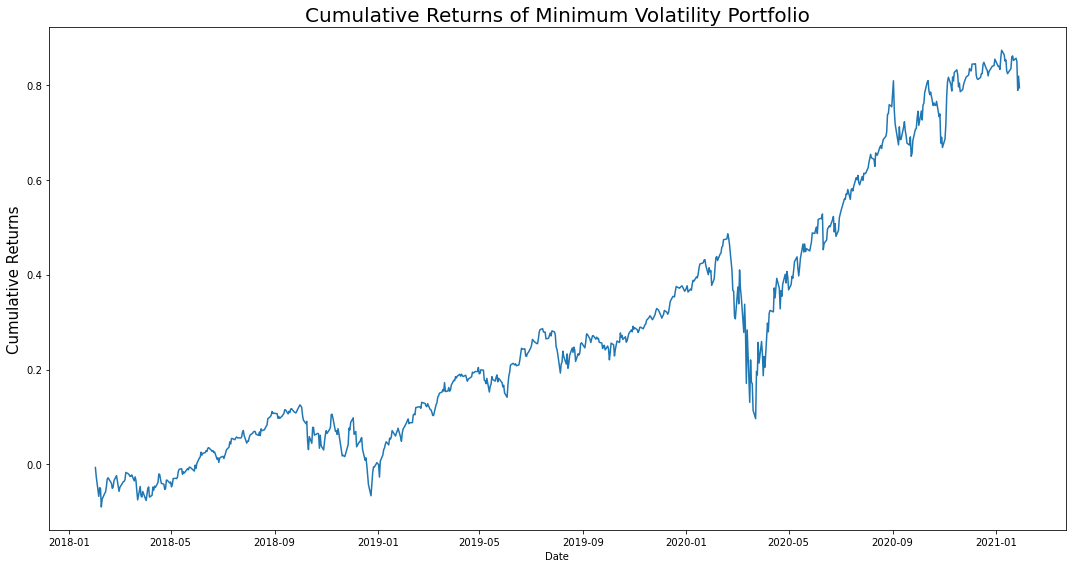

In [23]:
# Plot cumulative returns of minimum volatility portfolio

# Get weighted_returns
weighted_returns = returns.mul(portfolios_weights.iloc[328,:], axis = 1)


# Calculate total returns
total_returns    = weighted_returns.sum(axis = 1)


# Calculate cumulative returns
cumulative_returns = ((1 + total_returns).cumprod()-1)


##############################################################################
# Plot cumulative returns

# setting figure size
fig, ax = plt.subplots(figsize = (15, 8))


# histogram for returns
sns.lineplot(data  = cumulative_returns)


# this adds a title
plt.title(label    = "Cumulative Returns of Minimum Volatility Portfolio",
          fontsize = 20)


# this add a y-label
plt.ylabel(ylabel = 'Cumulative Returns', fontsize = 15)


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

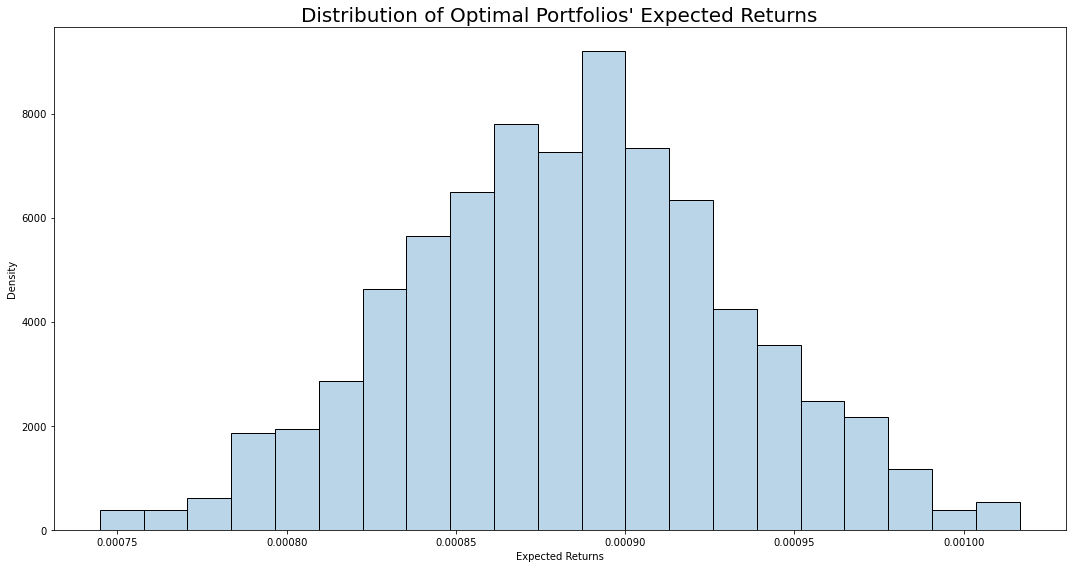

In [24]:
# Plot expected returns from portfolio simulations

expected_returns = portfolios['expected_return']

# setting figure size
fig, ax = plt.subplots(figsize = (15, 8))

# histogram for returns
sns.histplot(data  = expected_returns, # print portfolio returns
             bins  = 'fd',             # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,             # kernel density plot (line graph)
             alpha = 0.3,              # transparency of colors
             stat  = 'density')        # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label    = "Distribution of Optimal Portfolios' Expected Returns",
          fontsize = 20)


# this adds an x-label
plt.xlabel(xlabel = 'Expected Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()